# Problem Statement:
The dataset is a auto insurance data where the goal is to predict if an insurance claim is fraudulent or not.

# Importing Necessary Libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

In [158]:
insurance_fraud = pd.read_csv('Insurance_fraud_detection.csv')

In [159]:
df = pd.DataFrame(insurance_fraud)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [160]:
df.shape

(1000, 40)

- Has only 1000 rows so i will be careful while removing outliers to prevent data loss which will lead to information loss.
- 40 rows, I will PCA which will remove multicollinearity issue with independent variables.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- Has 2 float, 17 int & 21 object varfiables.
- hence the dataframe will be separated into numeric & object type to better EDA.

In [163]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

- Col Name do not have missing spaces and str character

In [164]:
df['policy_bind_date_year'] = pd.DatetimeIndex(df['policy_bind_date']).year

In [165]:
df['policy_bind_date_month'] = pd.DatetimeIndex(df['policy_bind_date']).month

In [166]:
df['policy_bind_date_day'] = pd.DatetimeIndex(df['policy_bind_date']).day

In [167]:
df['incident_date_year'] = pd.DatetimeIndex(df['incident_date']).year

In [168]:
df['incident_date_month'] = pd.DatetimeIndex(df['incident_date']).month

In [169]:
df['incident_date_day'] = pd.DatetimeIndex(df['incident_date']).day

- policy_bind_date & incident_date is further divided in to year,month & day col

In [170]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... auto_model auto_year fraud_reported _c39  \
0       466132  ...        92x      2004              Y  NaN   
1       468176  ...       E400      2007              Y  NaN   
2       430632  ...        RAM      2007              N  NaN   
3       608117  ...      Tahoe      2014              Y  NaN   
4       610706  ...        RSX      2009              N  NaN   

  policy_bind_date_year  policy_bind_date_month  policy_bind_date_day  \
0                  2014                      10                    17   
1                  2006                       6                    27   
2                  2000                       6                     9   
3                  1990                       5                    25   
4                  2014                       6                     6   

  incident_date_year incident_date_month incident_date_day  
0               2015                   1                25  
1               2015                   1                21  
2               2015                   2                22  
3               2015                  10                 1  
4               2015                   2                17  

[5 rows x 46 columns]

In [171]:
df.drop(['policy_bind_date', 'incident_date','_c39'],axis=1,inplace=True)

In [173]:
df.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ...  auto_make auto_model auto_year fraud_reported  \
0        MALE  ...       Saab        92x      2004              Y   
1        MALE  ...   Mercedes       E400      2007              Y   
2      FEMALE  ...      Dodge        RAM      2007              N   
3      FEMALE  ...  Chevrolet      Tahoe      2014              Y   
4        MALE  ...     Accura        RSX      2009              N   

   policy_bind_date_year  policy_bind_date_month policy_bind_date_day  \
0                   2014                      10                   17   
1                   2006                       6                   27   
2                   2000                       6                    9   
3                   1990                       5                   25   
4                   2014                       6                    6   

  incident_date_year incident_date_month incident_date_day  
0               2015                   1                25  
1               2015                   1                21  
2               2015                   2                22  
3               2015                  10                 1  
4               2015                   2                17  

[5 rows x 43 columns]

- policy_bind_date & incident_date are dropped as they are already converted into year,month & day col each.

In [174]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

- Target Col has imbalance Classes which will be upsampled later.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

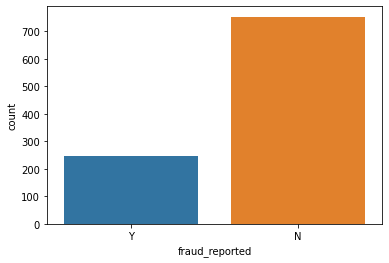

In [175]:
sns.countplot(df['fraud_reported'])

- Target Col has imbalance Classes which will be upsampled later.

In [176]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

- As it shows that there is no missing value but there are str char present in three col as discussed below.

In [177]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

- str charcter ? = 178 will be converted to NaN values which will be removed during null value treatment

<AxesSubplot:xlabel='collision_type', ylabel='count'>

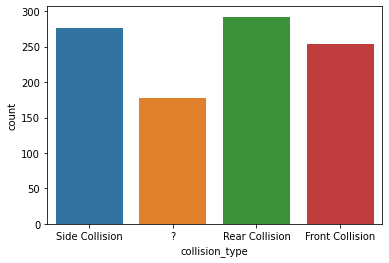

In [178]:
sns.countplot(df['collision_type'])

- str charcter ? = 178 will be converted to NaN values which will be removed during null value treatment

In [179]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

- str charcter ? = 360 will be converted to NaN values which will be removed during null value treatment

<AxesSubplot:xlabel='property_damage', ylabel='count'>

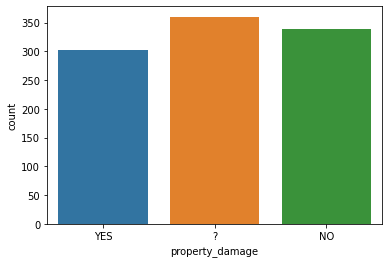

In [180]:
sns.countplot(df['property_damage'])

- str charcter ? = 360 will be converted to NaN values which will be removed during null value treatment

In [26]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

- str charcter ? = 343 will be converted to NaN values which will be removed during null value treatment

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

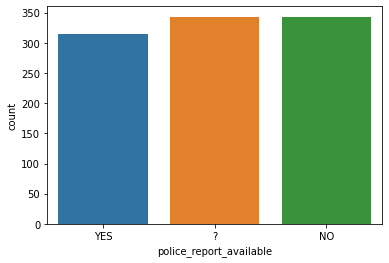

In [27]:
sns.countplot(df['police_report_available'])

- str charcter ? = 343 will be converted to NaN values which will be removed during null value treatment

In [28]:
numerics_var = ['float64', 'int64']
numeric_df = df.select_dtypes(include=numerics_var)
objects_df = df.select_dtypes(exclude=numerics_var)

In [29]:
objects_df.head()

policy_state policy_csl insured_sex insured_education_level  \
0           OH    250/500        MALE                      MD   
1           IN    250/500        MALE                      MD   
2           OH    100/300      FEMALE                     PhD   
3           IL    250/500      FEMALE                     PhD   
4           IL   500/1000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  \
0       craft-repair        sleeping              husband   
1  machine-op-inspct         reading       other-relative   
2              sales     board-games            own-child   
3       armed-forces     board-games            unmarried   
4              sales     board-games            unmarried   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

  property_damage police_report_available  auto_make auto_model fraud_reported  
0             YES                     YES       Saab        92x              Y  
1               ?                       ?   Mercedes       E400              Y  
2              NO                      NO      Dodge        RAM              N  
3               ?                      NO  Chevrolet      Tahoe              Y  
4              NO                      NO     Accura        RSX              N

In [30]:
objects_df.describe()

policy_state policy_csl insured_sex insured_education_level  \
count          1000       1000        1000                    1000   
unique            3          3           2                       7   
top              OH    250/500      FEMALE                      JD   
freq            352        351         537                     161   

       insured_occupation insured_hobbies insured_relationship  \
count                1000            1000                 1000   
unique                 14              20                    6   
top     machine-op-inspct         reading            own-child   
freq                   93              64                  183   

                  incident_type  collision_type incident_severity  \
count                      1000            1000              1000   
unique                        4               4                 4   
top     Multi-vehicle Collision  Rear Collision      Minor Damage   
freq                        419             292               354   

       authorities_contacted incident_state incident_city incident_location  \
count                   1000           1000          1000              1000   
unique                     5              7             7              1000   
top                   Police             NY   Springfield     6492 4th Lane   
freq                     292            262           157                 1   

       property_damage police_report_available auto_make auto_model  \
count             1000                    1000      1000       1000   
unique               3                       3        14         39   
top                  ?                      NO     Dodge        RAM   
freq               360                     343        80         43   

       fraud_reported  
count            1000  
unique              2  
top                 N  
freq              753

- auto_make has highest 39 unique classes with RAM freq is highest among all 
- insured_hobbies has 20 unique class with reading hobieshas highest freq which is equal to 64.

In [31]:
numeric_df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  injury_claim  \
count    1000.000000               1000.000000  ...   1000.000000   
mean   -26793.700000                 11.644000  ...   7433.420000   
std     28104.096686                  6.951373  ...   4880.951853   
min   -111100.000000                  0.000000  ...      0.000000   
25%    -51500.000000                  6.000000  ...   4295.000000   
50%    -23250.000000                 12.000000  ...   6775.000000   
75%         0.000000                 17.000000  ...  11305.000000   
max         0.000000                 23.000000  ...  21450.000000   

       property_claim  vehicle_claim    auto_year  policy_bind_date_year  \
count     1000.000000    1000.000000  1000.000000            1000.000000   
mean      7399.570000   37928.950000  2005.103000            2001.604000   
std       4824.726179   18886.252893     6.015861               7.360391   
min          0.000000      70.000000  1995.000000            1990.000000   
25%       4445.000000   30292.500000  2000.000000            1995.000000   
50%       6750.000000   42100.000000  2005.000000            2002.000000   
75%      10885.000000   50822.500000  2010.000000            2008.000000   
max      23670.000000   79560.000000  2015.000000            2015.000000   

       policy_bind_date_month  policy_bind_date_day  incident_date_year  \
count             1000.000000           1000.000000              1000.0   
mean                 6.559000             15.448000              2015.0   
std                  3.391758              8.850176                 0.0   
min                  1.000000              1.000000              2015.0   
25%                  4.000000              8.000000              2015.0   
50%                  7.000000             16.000000              2015.0   
75%                  9.000000             23.000000              2015.0   
max                 12.000000             31.000000              2015.0   

       incident_date_month  incident_date_day  
count          1000.000000         1000.00000  
mean              3.407000           13.08400  
std               3.276291           10.44318  
min               1.000000            1.00000  
25%               1.000000            2.00000  
50%               2.000000           15.00000  
75%               5.000000           22.00000  
max              12.000000           31.00000  

[8 rows x 24 columns]

- There are 24 numeric cols.
- upper_limit shows big diff between max & 75th percentile also mean is > then 50th percentile.
- Most of the variables has high std so it seems datas is spreaded & not linear.
- upper_limit indicate of outliers as it has more zeroes values.

In [32]:
numeric_df.head()

months_as_customer  age  policy_number  policy_deductable  \
0                 328   48         521585               1000   
1                 228   42         342868               2000   
2                 134   29         687698               2000   
3                 256   41         227811               2000   
4                 228   44         367455               1000   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                1406.91               0       466132          53300   
1                1197.22         5000000       468176              0   
2                1413.14         5000000       430632          35100   
3                1415.74         6000000       608117          48900   
4                1583.91         6000000       610706          66000   

   capital-loss  incident_hour_of_the_day  ...  injury_claim  property_claim  \
0             0                         5  ...          6510           13020   
1             0                         8  ...           780             780   
2             0                         7  ...          7700            3850   
3        -62400                         5  ...          6340            6340   
4        -46000                        20  ...          1300             650   

   vehicle_claim  auto_year  policy_bind_date_year  policy_bind_date_month  \
0          52080       2004                   2014                      10   
1           3510       2007                   2006                       6   
2          23100       2007                   2000                       6   
3          50720       2014                   1990                       5   
4           4550       2009                   2014                       6   

   policy_bind_date_day  incident_date_year  incident_date_month  \
0                    17                2015                    1   
1                    27                2015                    1   
2                     9                2015                    2   
3                    25                2015                   10   
4                     6                2015                    2   

   incident_date_day  
0                 25  
1                 21  
2                 22  
3                  1  
4                 17  

[5 rows x 24 columns]

In [33]:
numeric_df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_date_year          0.052511
policy_bind_date_month        -0.029321
policy_bind_date_day           0.024372
incident_date_year             0.000000
incident_date_month            1.375894
incident_date_day              0.059111
dtype: float64

- it seems most of the values fall with in normal range of +0.5 & -0.5 hence there is no need to treat skewness in numeric col.
- only upper_limit col is right skewed which will be removed by sqrt method later

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>],
       [<AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>],
       [<AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>,
        <Axe

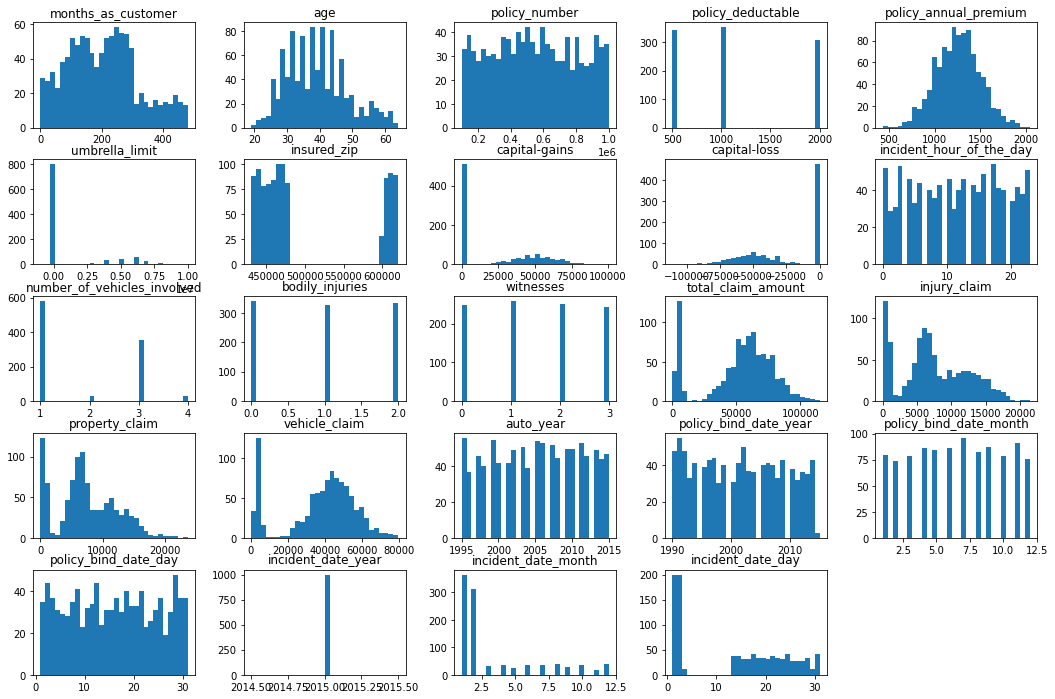

In [34]:
numeric_df.hist(grid=False, figsize=(18,12), bins=30)

In [35]:
numeric_df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_date_year          0.052511
policy_bind_date_month        -0.029321
policy_bind_date_day           0.024372
incident_date_year             0.000000
incident_date_month            1.375894
incident_date_day              0.059111
dtype: float64

<AxesSubplot:>

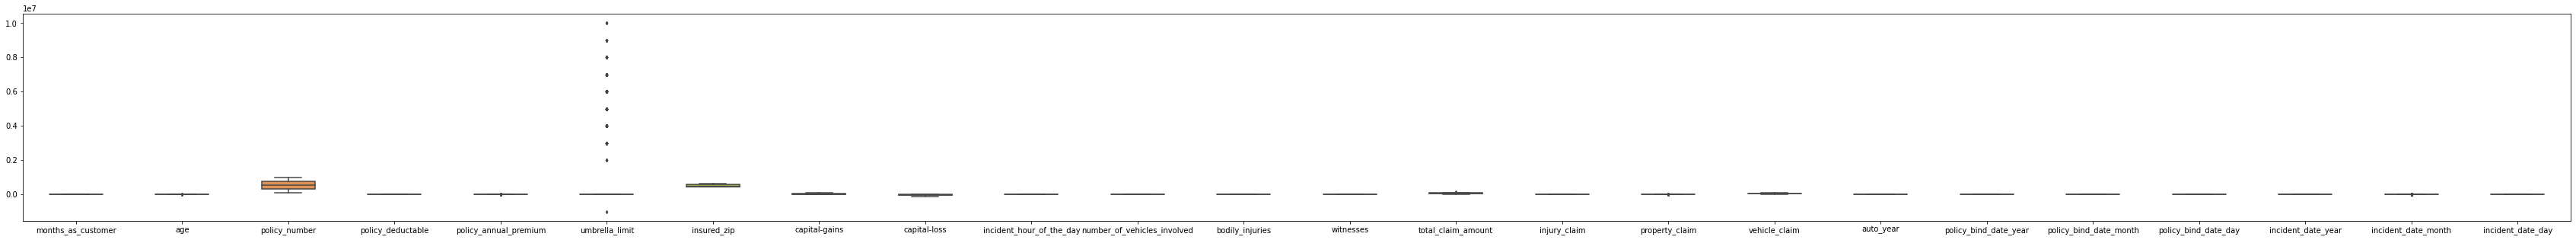

In [36]:
fig, ax =plt.subplots(figsize=(60,5))
sns.boxplot(data=numeric_df, width = 0.5,ax=ax, fliersize=3)

- only upper_limit col has outlier.
- I have not removed outlier as during my early test whole data was lost.

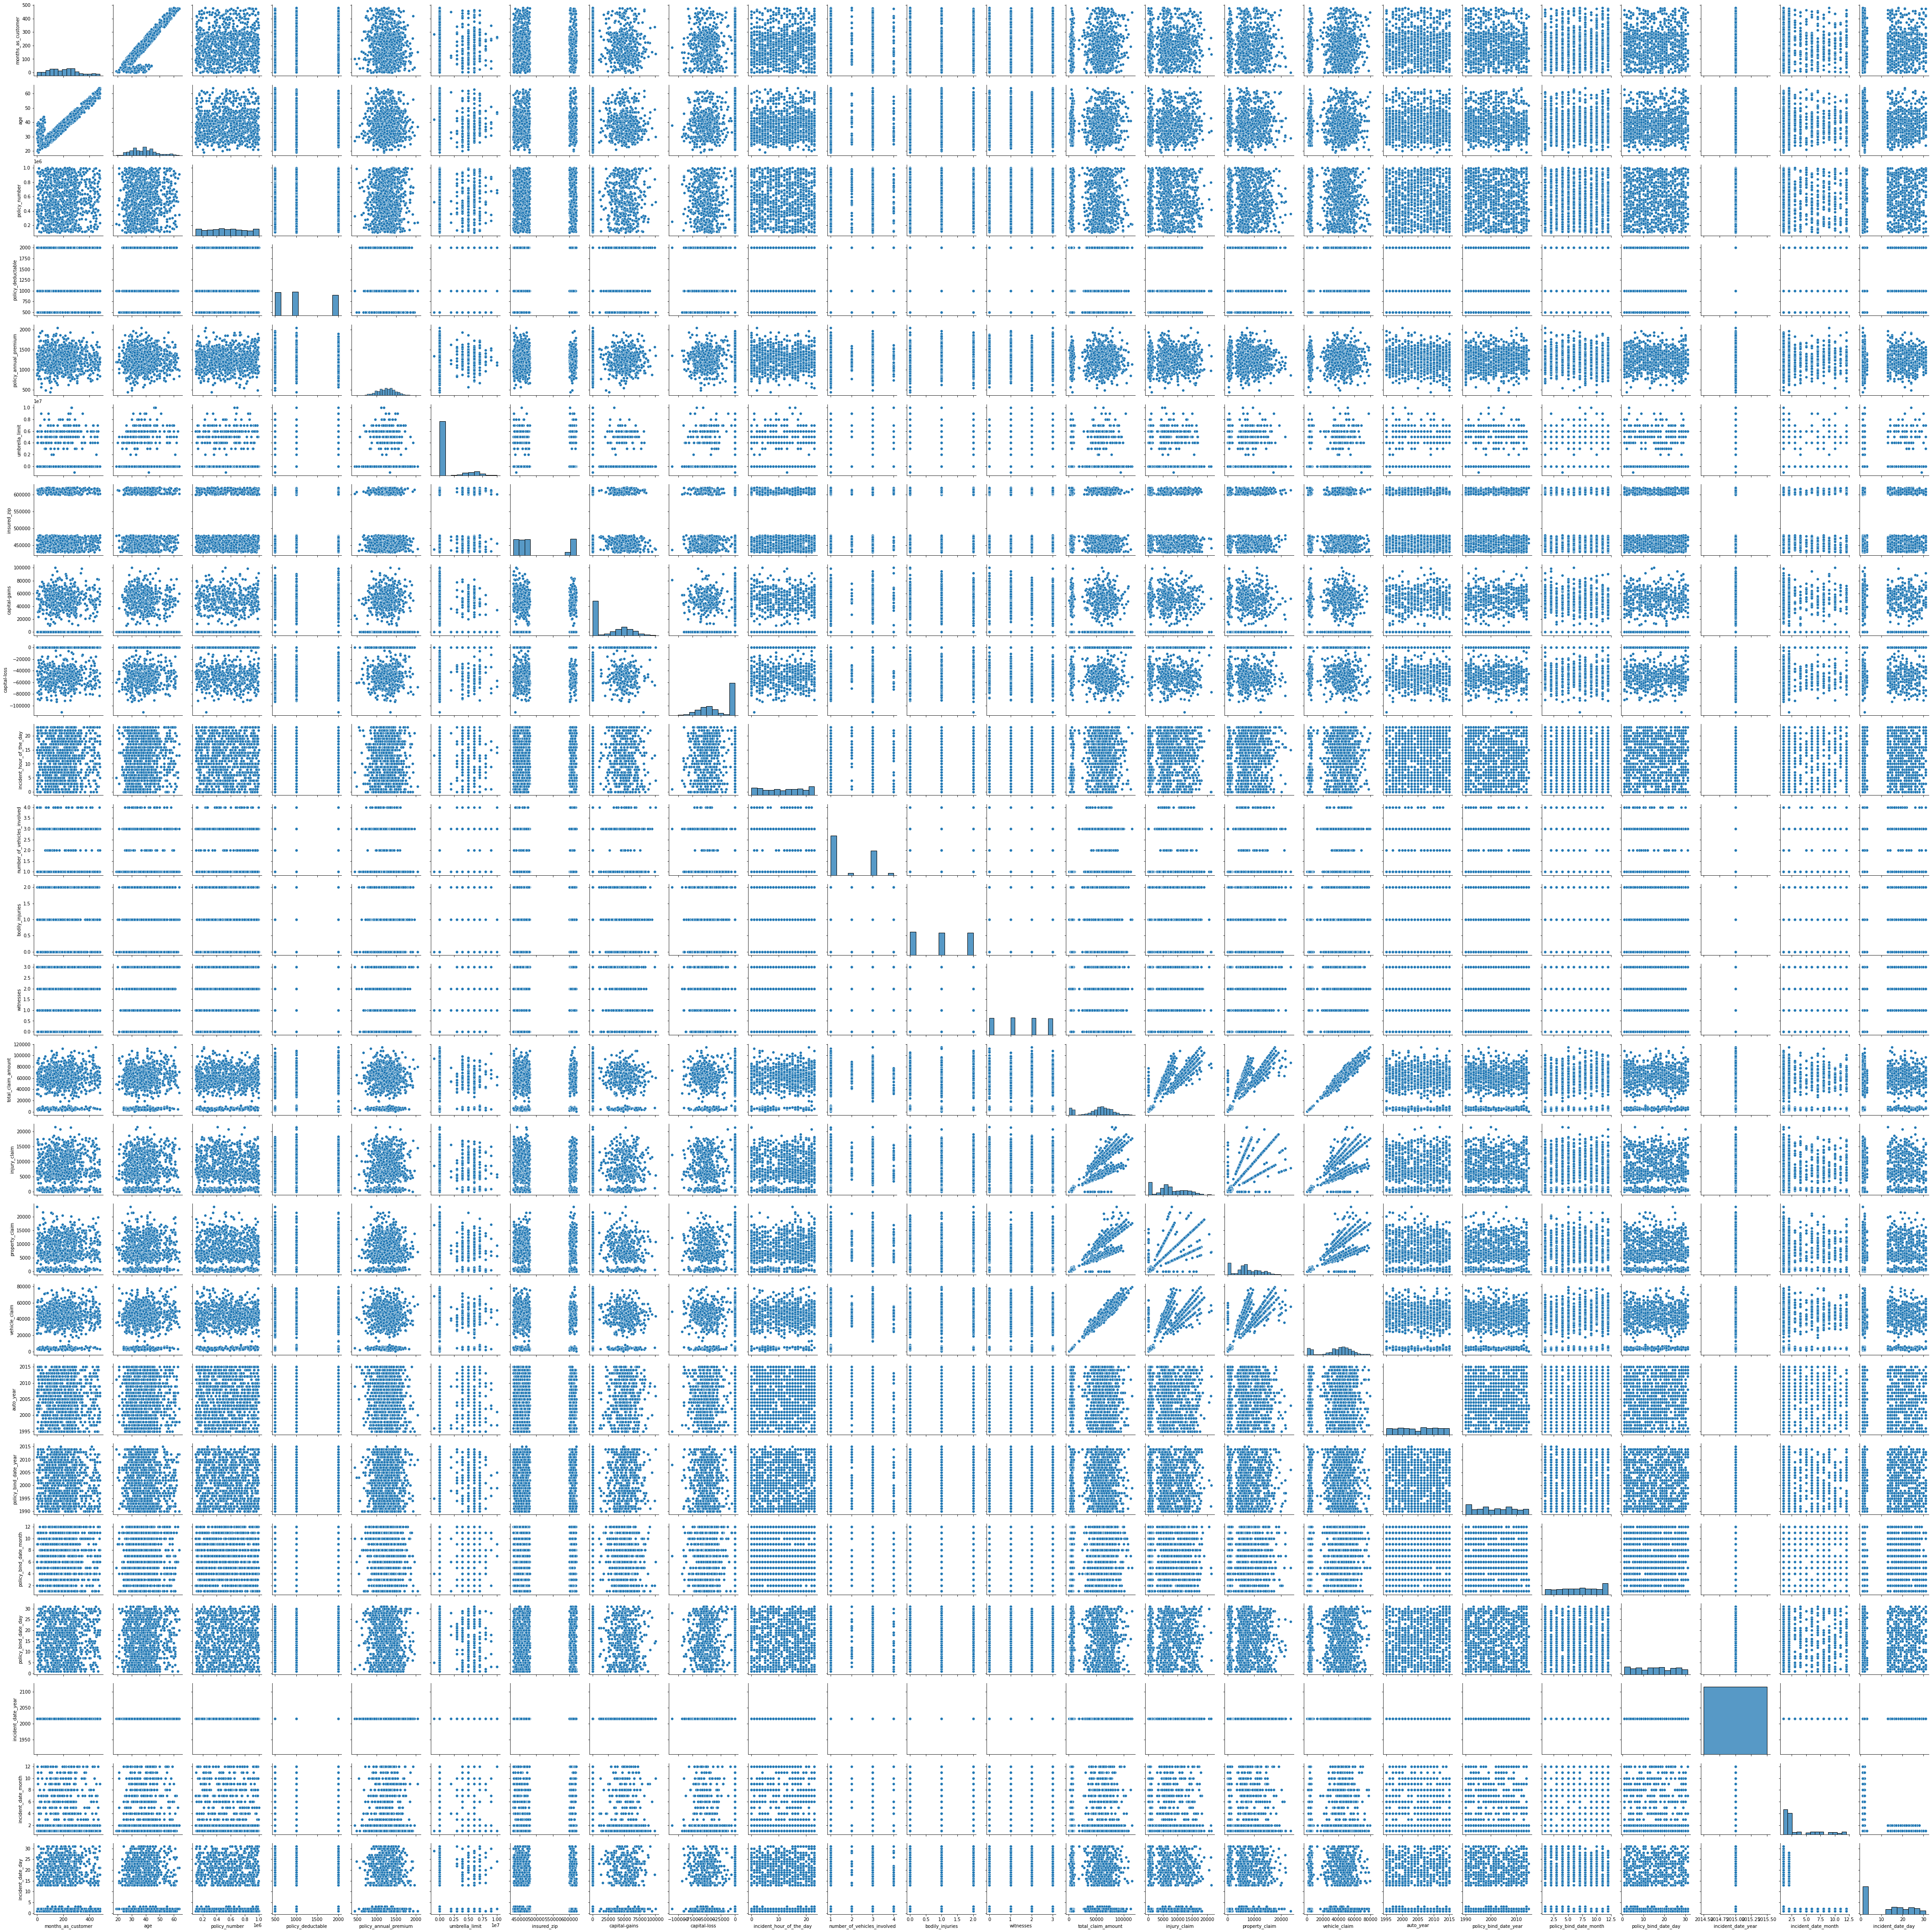

In [37]:
sns.pairplot(numeric_df)

- total claim amount,injury claim, property claim amount & vehicle claim variables shows linear relationship with each others
- rest data is not linear and spreaded.

In [181]:
# categorical variable encoding
cat_vars_list = objects_df.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

In [182]:
df['collision_type'].value_counts()

2    292
3    276
1    254
0    178
Name: collision_type, dtype: int64

? str represent 0 = 178

In [183]:
df['property_damage'].value_counts()

0    360
1    338
2    302
Name: property_damage, dtype: int64

? str represent 0 = 360

In [184]:
df['police_report_available'].value_counts()

1    343
0    343
2    314
Name: police_report_available, dtype: int64

- No - 1
- Yes - 2
- ? str represent 0= 343

In [42]:
df['police_report_available'].head()

0    2
1    0
2    1
3    1
4    1
Name: police_report_available, dtype: int32

In [185]:
df['collision_type'] = df['collision_type'].replace(0,np.nan)

In [186]:
df['property_damage'] = df['property_damage'].replace(0,np.nan)

In [187]:
df['police_report_available'] = df['police_report_available'].replace(0,np.nan)

In [188]:
df['collision_type'].value_counts()

2.0    292
3.0    276
1.0    254
Name: collision_type, dtype: int64

-collision_type, property_damage & police_report_available str char ? is replaced by nan value.

In [189]:
df['property_damage'].value_counts()

1.0    338
2.0    302
Name: property_damage, dtype: int64

In [48]:
df['police_report_available'].value_counts()

1.0    343
2.0    314
Name: police_report_available, dtype: int64

In [49]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [50]:
df['collision_type'].fillna(df['collision_type'].value_counts().idxmax(),inplace=True)

In [51]:
df['property_damage'].fillna(df['property_damage'].value_counts().idxmax(),inplace=True)

In [52]:
df['police_report_available'].fillna(df['police_report_available'].value_counts().idxmax(),inplace=True)

- Missing value is being removed of above variable after replacing str with NaN values.

In [53]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [54]:
corr = df.corr()
corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_state                          -0.000328 -0.014533       0.072815   
policy_csl                            -0.026819 -0.015185       0.038917   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.072787 -0.075642      -0.003338   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_location                     -0.013630 -0.011101       0.016393   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.005488 -0.003408      -0.019923   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available               -0.022146 -0.020441       0.031190   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   
policy_bind_date_year                 -0.048276 -0.037444      -0.040099   
policy_bind_date_month                 0.005750  0.015501       0.005509   
policy_bind_date_day                   0.051728  0.053869       0.041885   
incident_date_year                          NaN       NaN            NaN   
incident_date_month                    0.024659  0.023404      -0.042512   
incident_date_day                     -0.011092 -0.006131       0.057199   

                             policy_state  policy_csl  policy_deductable  \
months_as_customer              -0.000328   -0.026819           0.026807   
age                             -0.014533   -0.015185           0.029188   
policy_number                    0.072815    0.038917          -0.006738   
policy_state                     1.000000    0.001027           0.010033   
policy_csl                       0.001027    1.000000           0.003384   
policy_deductable                0.010033    0.003384           1.000000   
policy_annual_premium            0.012455    0.023978          -0.003245   
umbrella_limit                  -0.029580    0.021636           0.010870   


- Incident_date_year values is 2015 so it shows NaN 

In [55]:
df['incident_date_year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: incident_date_year, dtype: int64

In [56]:
df.drop(['incident_date_year'],axis=1,inplace=True)

- incident_date_year col is dropped as it is a year col which is year 2015.

In [57]:
corr = df.corr()
corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_state                          -0.000328 -0.014533       0.072815   
policy_csl                            -0.026819 -0.015185       0.038917   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.072787 -0.075642      -0.003338   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_location                     -0.013630 -0.011101       0.016393   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.005488 -0.003408      -0.019923   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available               -0.022146 -0.020441       0.031190   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   
policy_bind_date_year                 -0.048276 -0.037444      -0.040099   
policy_bind_date_month                 0.005750  0.015501       0.005509   
policy_bind_date_day                   0.051728  0.053869       0.041885   
incident_date_month                    0.024659  0.023404      -0.042512   
incident_date_day                     -0.011092 -0.006131       0.057199   

                             policy_state  policy_csl  policy_deductable  \
months_as_customer              -0.000328   -0.026819           0.026807   
age                             -0.014533   -0.015185           0.029188   
policy_number                    0.072815    0.038917          -0.006738   
policy_state                     1.000000    0.001027           0.010033   
policy_csl                       0.001027    1.000000           0.003384   
policy_deductable                0.010033    0.003384           1.000000   
policy_annual_premium            0.012455    0.023978          -0.003245   
umbrella_limit                  -0.029580    0.021636           0.010870   
insured_zip                      0.008777    0.006879           0.004545   


- fraud reported shows some +ve corr with total_claim_amount, injury claim, property claim & vehicle claim.
- total_claim_amount, injury claim, property claim & vehicle claim are corr with each other.

<AxesSubplot:>

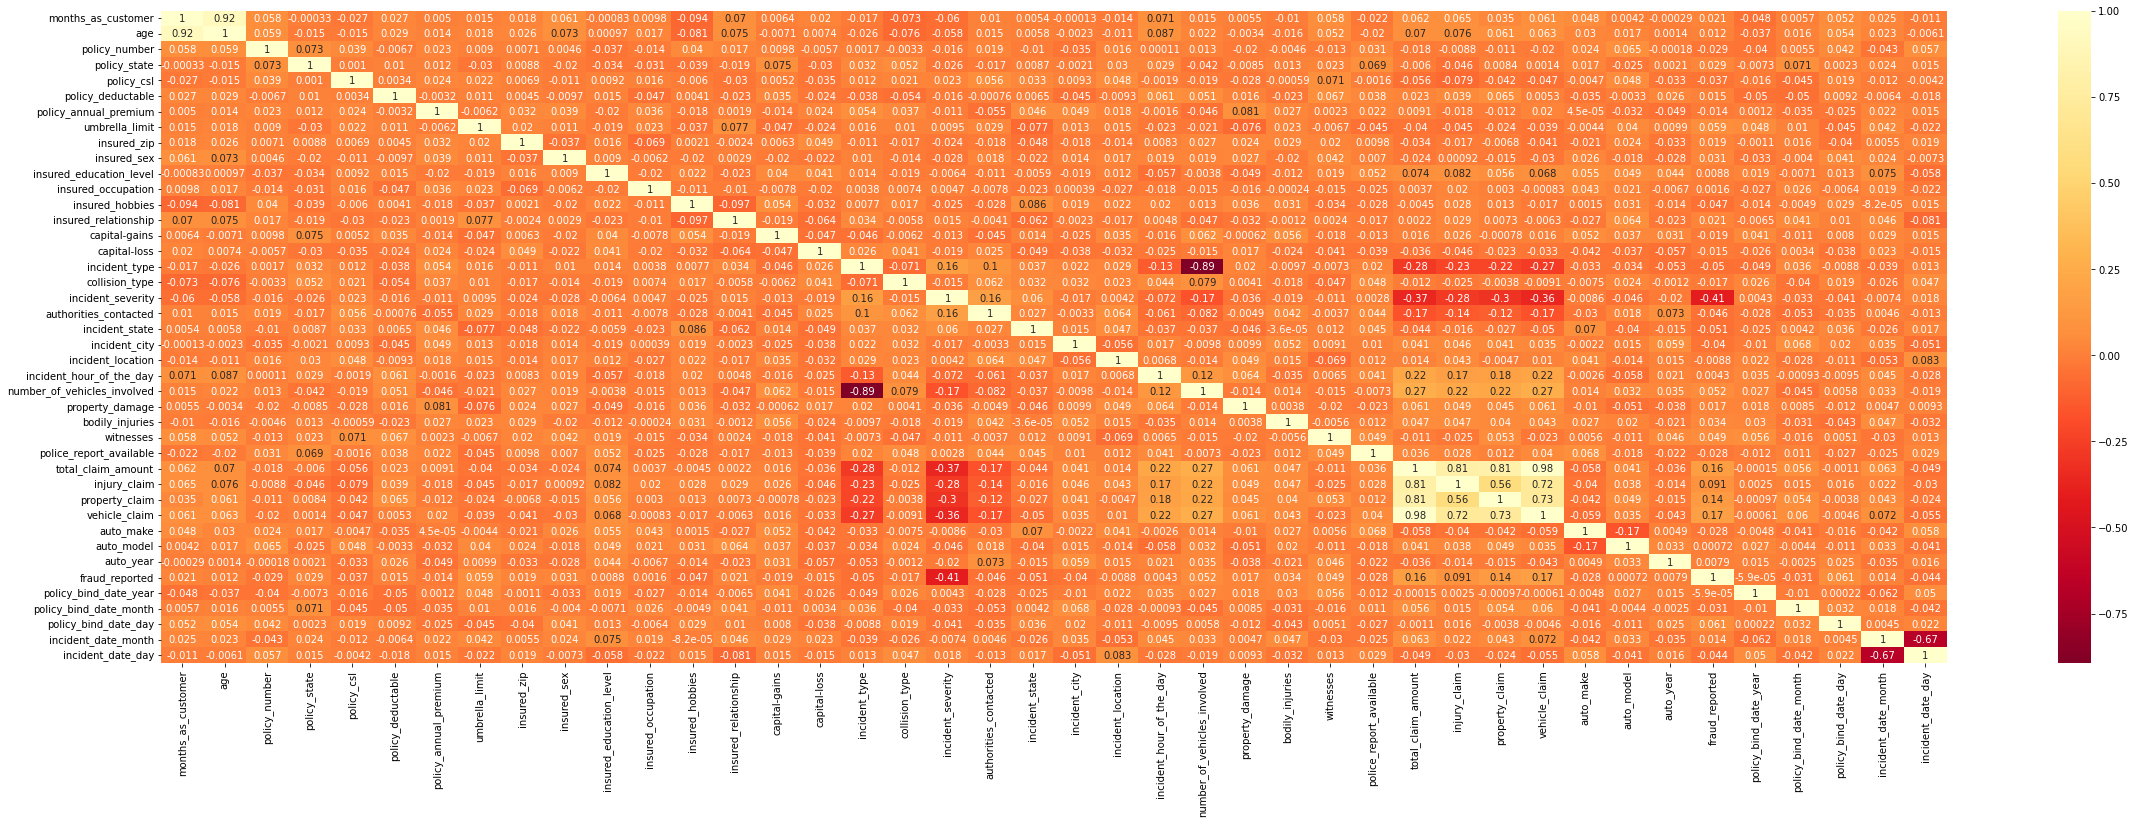

In [58]:
plt.figure(figsize=(40,12))
sns.heatmap(corr,cmap='YlOrRd_r', annot=True)

- fraud reported shows some +ve corr with total_claim_amount, injury claim, property claim & vehicle claim.
- total_claim_amount, injury claim, property claim & vehicle claim are corr with each other.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [61]:
vif_calc()

      VIF Factor                     features
0   2.839044e+01           months_as_customer
1   1.316372e+02                          age
2   5.709759e+00                policy_number
3   2.608880e+00                 policy_state
4   2.478935e+00                   policy_csl
5   4.641432e+00            policy_deductable
6   2.864845e+01        policy_annual_premium
7   1.282231e+00               umbrella_limit
8   5.134401e+01                  insured_zip
9   1.915104e+00                  insured_sex
10  3.472783e+00      insured_education_level
11  3.826298e+00           insured_occupation
12  4.157489e+00              insured_hobbies
13  3.226022e+00         insured_relationship
14  1.882593e+00                capital-gains
15  1.989286e+00                 capital-loss
16  1.109822e+01                incident_type
17  9.139127e+00               collision_type
18  3.619317e+00            incident_severity
19  3.268813e+00        authorities_contacted
20  3.426376e+00               inc

- total_claim_amount, injury claim, property claim & vehicle claim are corr with each other.

In [62]:
numeric_df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_date_year          0.052511
policy_bind_date_month        -0.029321
policy_bind_date_day           0.024372
incident_date_year             0.000000
incident_date_month            1.375894
incident_date_day              0.059111
dtype: float64

-  Most of the numeric values fall with in +0.5 & -0.5 of normal range except umbrella_limit

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

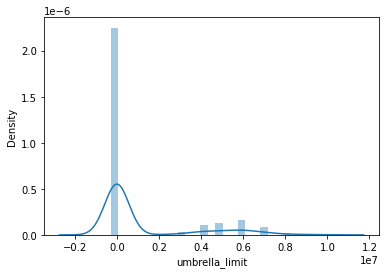

In [63]:
sns.distplot(df['umbrella_limit'])

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.578304
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


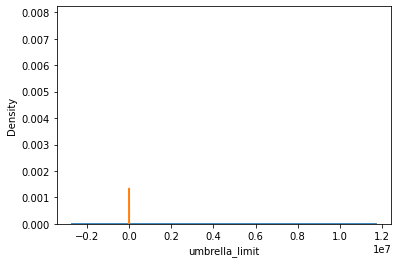

In [64]:
import numpy as np
sns.distplot(df['umbrella_limit'])
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])
sns.distplot(df['umbrella_limit'])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.515539
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


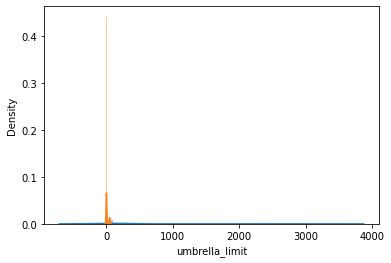

In [65]:
import numpy as np
sns.distplot(df['umbrella_limit'])
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])
sns.distplot(df['umbrella_limit'])
df.skew()

- multiple sqrt method is applied to upper_limit col to remove skewness to fall in normal range as seen above

# Outliers Boxplot

<AxesSubplot:>

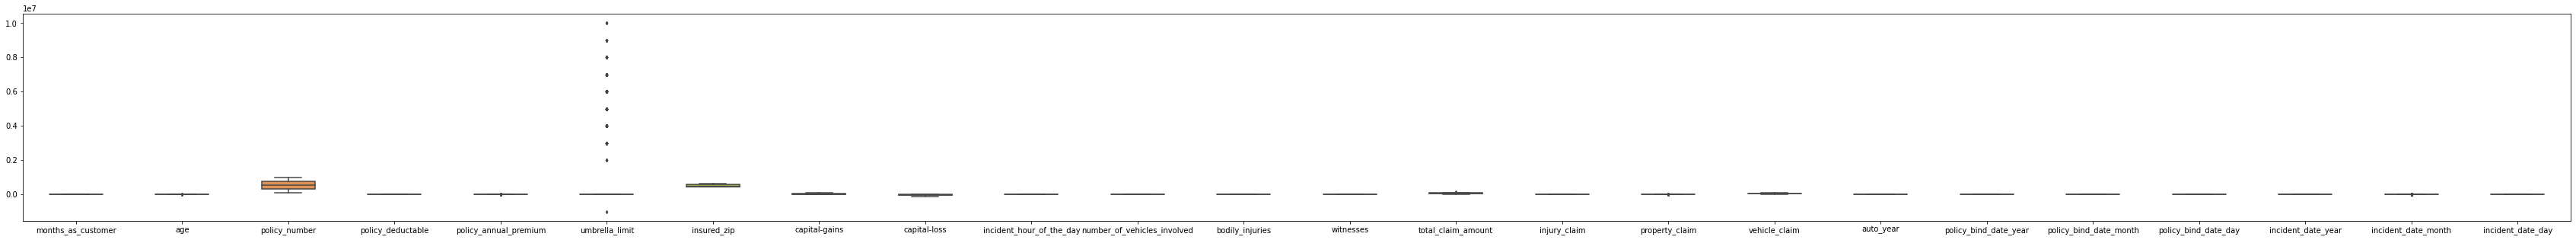

In [66]:
fig, ax =plt.subplots(figsize=(60,5))
sns.boxplot(data=numeric_df, width = 0.5,ax=ax, fliersize=3)

-  as the number of rows is to less and only one col has outliers covering 1000 rows
- Hence after removing outliers no dataleft for treatment hence outliers not removed

In [67]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [68]:
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

In [69]:
x.shape

(1000, 41)

In [70]:
y.shape

(1000,)

In [71]:
x.head()

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                 328   48         521585             2           1   
1                 228   42         342868             1           1   
2                 134   29         687698             2           0   
3                 256   41         227811             0           1   
4                 228   44         367455             0           2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91         0.00000       466132   
1               2000                1197.22        47.28708       468176   
2               2000                1413.14        47.28708       430632   
3               2000                1415.74        49.49232       608117   
4               1000                1583.91        49.49232       610706   

   insured_sex  ...  property_claim  vehicle_claim  auto_make  auto_model  \
0            1  ...           13020          52080         10           1   
1            1  ...             780           3510          8          12   
2            0  ...            3850          23100          4          30   
3            0  ...            6340          50720          3          34   
4            1  ...             650           4550          0          31   

   auto_year  policy_bind_date_year  policy_bind_date_month  \
0       2004                   2014                      10   
1       2007                   2006                       6   
2       2007                   2000                       6   
3       2014                   1990                       5   
4       2009                   2014                       6   

   policy_bind_date_day  incident_date_month  incident_date_day  
0                    17                    1                 25  
1                    27                    1                 21  
2                     9                    2                 22  
3                    25                   10                  1  
4                     6                    2                 17  

[5 rows x 41 columns]

In [72]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

No - 753 & Yes - 1

# Upsampling Target Class of yes to the class of No

In [73]:
from sklearn.utils import resample

In [74]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

In [75]:
Ano = x[x.fraud_reported==0]
Ays = x[x.fraud_reported==1]

In [76]:
# upsample minority
dia_upsampled = resample(Ays,
                          replace=True, # sample with replacement
                          n_samples=len(Ano),   # match number in majority
                          random_state=27)  # reproducible results

In [77]:
upsampled = pd.concat([Ano, dia_upsampled])

In [78]:
upsampled.fraud_reported.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

- the yes class of target col is upsampled with class No

In [79]:
upsampled.head()

months_as_customer  age  policy_number  policy_state  policy_csl  \
2                 134   29         687698             2           0   
4                 228   44         367455             0           2   
6                 137   34         413978             1           1   
7                 165   37         429027             0           0   
8                  27   33         485665             0           0   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
2               2000                1413.14        47.28708       430632   
4               1000                1583.91        49.49232       610706   
6               1000                1333.35         0.00000       441716   
7               1000                1137.03         0.00000       603195   
8                500                1442.99         0.00000       601734   

   insured_sex  ...  vehicle_claim  auto_make  auto_model  auto_year  \
2            0  ...          23100          4          30       2007   
4            1  ...           4550          0          31       2009   
6            1  ...          50050          9          29       2012   
7            1  ...          32830          1           5       2015   
8            0  ...          22160         12           9       2012   

   policy_bind_date_year  policy_bind_date_month  policy_bind_date_day  \
2                   2000                       6                     9   
4                   2014                       6                     6   
6                   2000                       4                     6   
7                   1990                       3                     2   
8                   1997                       5                     2   

   incident_date_month  incident_date_day  fraud_reported  
2                    2                 22               0  
4                    2                 17               0  
6                    1                 13               0  
7                    2                 27               0  
8                    1                 30               0  

[5 rows x 42 columns]

In [80]:
x=upsampled.drop("fraud_reported",axis=1)
y=upsampled["fraud_reported"]

In [81]:
x.shape

(1506, 41)

In [82]:
y.shape

(1506,)

In [83]:
y = y.drop(labels=(208), axis=0)

In [84]:
y.shape

(1505,)

In [93]:
x.head()

months_as_customer  age  policy_number  policy_state  policy_csl  \
2                 134   29         687698             2           0   
4                 228   44         367455             0           2   
6                 137   34         413978             1           1   
7                 165   37         429027             0           0   
8                  27   33         485665             0           0   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
2               2000                1413.14        47.28708       430632   
4               1000                1583.91        49.49232       610706   
6               1000                1333.35         0.00000       441716   
7               1000                1137.03         0.00000       603195   
8                500                1442.99         0.00000       601734   

   insured_sex  ...  property_claim  vehicle_claim  auto_make  auto_model  \
2            0  ...            3850          23100          4          30   
4            1  ...             650           4550          0          31   
6            1  ...            7150          50050          9          29   
7            1  ...            9380          32830          1           5   
8            0  ...            2770          22160         12           9   

   auto_year  policy_bind_date_year  policy_bind_date_month  \
2       2007                   2000                       6   
4       2009                   2014                       6   
6       2012                   2000                       4   
7       2015                   1990                       3   
8       2012                   1997                       5   

   policy_bind_date_day  incident_date_month  incident_date_day  
2                     9                    2                 22  
4                     6                    2                 17  
6                     6                    1                 13  
7                     2                    2                 27  
8                     2                    1                 30  

[5 rows x 41 columns]

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[-0.61374962, -1.07246782,  0.58463528, ..., -0.79238129,
        -0.44687316,  0.89124122],
       [ 0.19215007,  0.52741649, -0.67206138, ..., -1.13081754,
        -0.44687316,  0.41317836],
       [-0.58802942, -0.53917305, -0.48949596, ..., -1.13081754,
        -0.75002224,  0.03072808],
       ...,
       [-0.4165614 , -0.85914991, -1.63747666, ..., -0.90519338,
        -0.44687316,  0.12634065],
       [ 0.42363189,  0.42075753,  0.22082296, ..., -1.24362963,
         1.97831954, -1.0210102 ],
       [ 1.02376996,  0.84739335,  1.42021457, ..., -1.58206588,
        -0.75002224,  0.12634065]])

In [97]:
z = pd.DataFrame(x)

In [98]:
z.head(50)

0         1         2         3         4         5         6   \
0  -0.613750 -1.072468  0.584635  1.178799 -1.168080  1.370228  0.689004   
1   0.192150  0.527416 -0.672061 -1.253079  1.339587 -0.246351  1.389527   
2  -0.588029 -0.539173 -0.489496 -0.037140  0.085754 -0.246351  0.361694   
3  -0.347974 -0.219196 -0.430441 -1.253079 -1.168080 -0.246351 -0.443640   
4  -1.531104 -0.645832 -0.208182 -1.253079 -1.168080 -1.054641  0.811453   
5   0.054976  0.314099  0.383920 -1.253079 -1.168080 -1.054641  0.289209   
6   0.252164  0.314099  0.019206  1.178799 -1.168080 -1.054641  0.032578   
7   2.069725  2.340619 -1.271824  1.178799 -1.168080  1.370228 -0.443106   
8  -1.248181 -1.712422  1.192670  1.178799  1.339587 -1.054641 -0.122319   
9  -0.725204 -0.539173  0.345691  1.178799 -1.168080 -0.246351 -1.265792   
10 -1.162447 -1.392445  0.079356  1.178799  1.339587 -0.246351 -0.187625   
11 -0.562309 -0.859150 -1.033833 -0.037140  1.339587 -1.054641 -2.200958   
12 -0.390841 -0.219196  1.500951  1.178799  1.339587 -1.054641  0.529348   
13 -0.082199 -0.005878 -1.549053 -0.037140  1.339587  1.370228  0.945757   
14  2.181179  2.447278 -1.394212 -0.037140  0.085754 -0.246351 -0.234717   
15  0.097843  0.207440 -0.419261 -1.253079  1.339587  1.370228 -1.517910   
16  0.269311  0.100781  0.777643 -0.037140 -1.168080 -0.246351 -1.484436   
17  0.440779  0.420758  1.273481 -0.037140 -1.168080  1.370228  0.315545   
18  0.157856  0.100781  1.473034  1.178799 -1.168080  1.370228  0.190839   
19  0.303604  0.634075  0.227875 -1.253079  1.339587  1.370228 -0.577083   
20 -1.213888 -1.499104  1.451561 -1.253079  0.085754 -0.246351 -1.193799   
21 -0.433708 -0.432514 -0.793088 -1.253079  1.339587 -0.246351 -0.643373   
22 -0.785218 -0.965809  0.181075 -1.253079 -1.168080 -0.246351  1.284430   
23 -0.485149 -0.219196  1.772863 -1.253079  1.339587 -1.054641  0.699423   
24  0.715128  1.060711  1.548398 -1.253079  1.339587  1.370228 -0.093111   
25  1.932550  1.594006 -0.208186 -0.037140  1.339587  1.370228 -0.367668   
26 -1.085287 -1.392445 -1.304807 -1.253079 -1.168080 -1.054641  0.846855   
27 -1.445370 -1.712422 -0.352216 -1.253079  1.339587 -1.054641  0.946578   
28 -0.853805 -0.965809  0.987823  1.178799  0.085754 -1.054641 -2.900251   
29  0.543660  0.527416 -1.686902 -1.253079 -1.168080  1.370228 -0.673155   
30  0.509366  0.100781 -0.426509 -1.253079  0.085754 -0.246351  0.858382   
31 -0.365121 -0.645832 -0.037687 -0.037140 -1.168080 -1.054641 -0.019314   
32 -0.262240 -0.539173  1.287981 -0.037140  1.339587 -0.246351 -0.497624   
33 -0.116492 -0.432514  0.169899 -1.253079 -1.168080 -0.246351  0.002920   
34  1.923977  2.127301  0.598335  1.178799  0.085754  1.370228  0.334086   
35 -0.982406 -1.285786 -0.004591 -1.253079 -1.168080  1.370228 -0.702895   
36  0.097843 -0.005878 -0.564067 -0.037140 -1.168080 -0.246351  1.170514   
37  0.149283  0.100781  0.749200 -0.037140 -1.168080 -1.054641 -0.179544   
38 -0.090772 -0.005878 -1.006638  1.178799  0.085754 -0.246351  0.608725   
39 -1.573971 -1.392445 -0.462686  1.178799 -1.168080 -0.246351  0.128774   
40  2.001138  1.807324 -0.054467 -0.037140  0.085754 -1.054641 -0.667371   
41 -0.956686 -0.752491 -0.908533 -0.037140  1.339587 -0.246351  0.695567   
42 -1.668278 -0.005878  0.333290 -1.253079  0.085754  1.370228  0.922498   
43 -0.468002 -0.325855 -0.209332  1.178799  0.085754  1.370228 -1.536451   
44  0.337898  0.527416 -0.921122 -1.253079  1.339587 -0.246351 -0.315776   
45 -0.742351 -0.752491 -0.767396 -1.253079  1.339587 -0.246351 -1.032380   
46  2.335500  2.660596 -0.756247  1.178799  0.085754 -1.054641 -1.682529   
47 -0.665190 -0.965809 -0.149837  1.178799 -1.168080 -0.246351 -0.754172   
48  1.135224  1.060711 -0.747586 -0.037140  1.339587 -0.246351  0.139070   
49 -0.056479  0.207440  0.464347  1.178799  0.085754 -0.246351 -1.433077   

          7         8         9   ...        31        32        33        34  \
0   1.845999 -1.002951 -0.936913  ... -0.812074 -0.9

In [99]:
z = z.drop(labels=(208), axis=0)

- col no 7 has missing value at row 208 so i have removed row no 208

In [100]:
z.drop([17],axis=1,inplace=True)

- col 17 has high zero value hence dropped

In [101]:
z.head()

0         1         2         3         4         5         6   \
0 -0.613750 -1.072468  0.584635  1.178799 -1.168080  1.370228  0.689004   
1  0.192150  0.527416 -0.672061 -1.253079  1.339587 -0.246351  1.389527   
2 -0.588029 -0.539173 -0.489496 -0.037140  0.085754 -0.246351  0.361694   
3 -0.347974 -0.219196 -0.430441 -1.253079 -1.168080 -0.246351 -0.443640   
4 -1.531104 -0.645832 -0.208182 -1.253079 -1.168080 -1.054641  0.811453   

         7         8         9   ...        31        32        33        34  \
0  1.845999 -1.002951 -0.936913  ... -0.812074 -0.921340 -0.589505  0.963271   
1  1.956754  1.499824  1.067335  ... -1.487725 -1.958614 -1.588149  1.052880   
2 -0.528925 -0.848899  1.067335  ... -0.115309  0.585643  0.658800  0.873661   
3 -0.528925  1.395431  1.067335  ...  0.355536 -0.377261 -1.338488 -1.276963   
4 -0.528925  1.375125 -0.936913  ... -1.040106 -0.973903  1.407783 -0.918525   

         35        36        37        38        39        40  
0  0.302710 -0.215270 -0.144271 -0.792381 -0.446873  0.891241  
1  0.631273  1.689370 -0.144271 -1.130818 -0.446873  0.413178  
2  1.124118 -0.215270 -0.732286 -1.130818 -0.750022  0.030728  
3  1.616962 -1.575727 -1.026294 -1.582066 -0.446873  1.369304  
4  1.124118 -0.623407 -0.438279 -1.582066 -0.750022  1.656142  

[5 rows x 40 columns]

In [102]:
x = z

In [103]:
x.shape

(1505, 40)

In [104]:
y.shape

(1505,)

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(n_components=20)
x = pca.fit_transform(x)

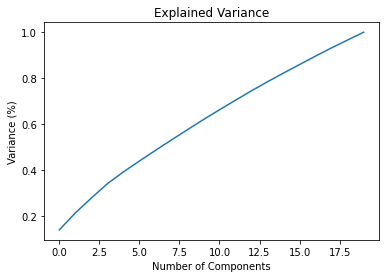

In [107]:
import matplotlib.pyplot as plt
import seaborn as sna
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

- as i have set total 20 PCA component where 16 component is explaing the max variance and no collinearity in them.
- i have not set PCA value to low count which will lead to information loss.

In [108]:
pca = PCA(n_components=16)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16'])

In [109]:
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0    -0.896789 -1.272726 -0.833475 -1.004401  2.335532 -0.420261 -0.490142   
1    -3.535981  1.188224  0.167582 -1.150892  1.193625 -0.481421  0.991312   
2     1.812255 -1.242423 -0.183672  0.254737  1.599051 -0.596441 -1.708021   
3     0.204248 -0.392189 -1.272433 -0.800798  0.582992 -1.513234 -1.221974   
4    -2.854909 -1.013734 -1.001965  1.496907 -0.384294 -1.089055 -1.039435   
...        ...       ...       ...       ...       ...       ...       ...   
1500  2.381980 -1.934769  0.123361 -1.315551 -1.366808 -0.313119 -0.715086   
1501  1.077336  1.068870 -1.567055 -1.142960  1.790418  0.297321 -0.621791   
1502  0.226964 -1.737321 -0.335428 -1.821379  3.083730  0.003879  0.113405   
1503  2.259521  0.296484  1.368684 -1.703689  0.470558  0.626109  0.152876   
1504  0.577937  2.008274 -0.363505  1.268404 -0.223260  1.245302  1.967828   

          PC-8      PC-9     PC-10     PC-11     PC-12     PC-13     PC-14  \
0     0.058178 -1.250447  0.483268  0.258242 -1.402378 -0.702003  0.833383   
1    -1.527379 -0.899866  2.466497 -0.611697 -1.194307 -0.365870  1.042010   
2     0.534082  0.807093 -0.722475  0.980432  0.621560 -1.266085  0.956453   
3     0.112930 -1.959758 -0.275726  0.170025  1.115841 -3.114307 -0.365236   
4     0.959023 -0.671745 -1.100610  1.043054  0.798616 -0.467606  0.931232   
...        ...       ...       ...       ...       ...       ...       ...   
1500  0.982858 -0.637442  0.502438 -1.388589 -0.101453  0.089451  0.068053   
1501  1.305377 -0.920806  1.609126 -1.452645  1.040544  0.671190  1.638397   
1502  0.513042  0.667366  1.567619  0.794590 -0.176700 -1.636895  0.031514   
1503  0.051564 -0.151383 -1.066778  0.676895 -2.335448 -0.518493  0.854506   
1504  0.547834  1.080628  0.505018 -0.790565 -0.988603 -0.789777  0.657752   

         PC-15     PC-16  
0    -0.963724  0.816832  
1    -1.302862 -1.259989  
2    -0.580034  1.087065  
3     1.505006 -0.152746  
4     0.165166 -0.199530  
...        ...       ...  
1500 -1.760817 -0.152458  
1501  1.779511 -0.334733  
1502 -0.063873  0.183716  
1503  0.543249 -1.646288  
1504  1.158474 -1.470951  

[1505 rows x 16 columns]

In [110]:
x = principal_x

In [111]:
x.shape

(1505, 16)

In [112]:
y.shape

(1505,)

In [113]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

85.3118712273642 at random_state 0
83.29979879275655 at random_state 1
80.28169014084507 at random_state 2
81.28772635814889 at random_state 3
81.69014084507043 at random_state 4
78.87323943661971 at random_state 5
80.6841046277666 at random_state 6
78.67203219315896 at random_state 7
80.48289738430584 at random_state 8
80.08048289738431 at random_state 9
82.49496981891348 at random_state 10
78.26961770623743 at random_state 11
82.897384305835 at random_state 12
81.28772635814889 at random_state 13
80.08048289738431 at random_state 14
83.90342052313883 at random_state 15
78.4708249496982 at random_state 16
81.08651911468813 at random_state 17
80.6841046277666 at random_state 18
84.50704225352112 at random_state 19
78.4708249496982 at random_state 20
81.28772635814889 at random_state 21
79.27565392354124 at random_state 22
78.67203219315896 at random_state 23
80.88531187122736 at random_state 24
81.69014084507043 at random_state 25
81.08651911468813 at random_state 26
84.30583501006036 

In [114]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8694690265486725  on Random_state  56


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 56)

In [116]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


[1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1]
0.6061946902654868
              precision    recall  f1-score   support

        

In [117]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

0.8761061946902655
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       251
           1       0.80      0.96      0.87       201

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.89      0.88      0.88       452



In [118]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

0.8982300884955752
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       251
           1       0.86      0.93      0.89       201

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



In [119]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


0.7610619469026548
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       251
           1       0.69      0.83      0.76       201

    accuracy                           0.76       452
   macro avg       0.77      0.77      0.76       452
weighted avg       0.77      0.76      0.76       452



In [120]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

0.7278761061946902
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       251
           1       0.67      0.78      0.72       201

    accuracy                           0.73       452
   macro avg       0.73      0.73      0.73       452
weighted avg       0.74      0.73      0.73       452



# K-fold Cross Validation

In [121]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [122]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [123]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.6046511627906976


In [124]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.8272425249169435


In [125]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.921594684385382


In [126]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Classifier  CV o/p

0.7415282392026579


In [127]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.7242524916943521


# Best Model:

I have used knn as the best model as the diff between Knn Acc - knn CV score is very less which is  = 0.55

# Knn Hyperparameter & GridsearchCV

In [143]:
from sklearn.model_selection import GridSearchCV 

In [144]:
import numpy as np
parameter = {'n_neighbors' : [1,2,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree'],
            'leaf_size': [30],
            'metric':['minkowski']}

In [145]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)

In [146]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'n_neighbors': [1, 2, 4, 5],
                         'weights': ['uniform', 'distance']})

In [147]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [148]:
Final_mod = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,metric= 'minkowski',n_neighbors = 1,weights= 'uniform')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.17699115044249


# AUC-ROC Curve

In [149]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

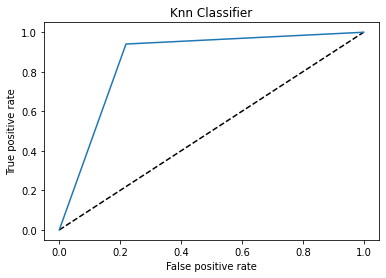

0.8605875007432955

In [150]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Knn Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Knn Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

In [151]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']